# Econ-149-Project

Purpose of this Project (Project Overview)

This project aims to track and analyze the trends of nominal GDP growth alongside income growth, inflation, and the rise of housing costs. The goal of this project is to illustrate growing disparities between the size of the economy and the wealth of the average American, as reflected in many political and economic statements. We hypothesize that there will be a negative relationship with nominal GDP growth per year and median income growth rate per year. We also hypothesize that nominal GDP growth will have a general positive relationship with inflation and cost of housing, both of which will negatively correlate to median income growth.


Structure of the Project Report

We anticipate that the project will have four sections: nominal GDP growth by year, inflation rate by year, median income growth rate per year, and cost of housing growth rate per year. The project will then have a cumulative chart showing all the trends together. As mentioned in the purpose, the project seeks to create a visualization of the aforementioned trends. Growth or decline will be indicated in percentage change from the previous year.

The project will begin with a graph showing nominal GDP from 1970 to 2019, and three others showing income growth, inflation, and housing costs annually, in that respective order. This part will establish the data, and explain what each graph is showing. The second will begin the overlapping sequence, where we will compare nominal GDP growth with income growth, to compare economic growth with income growth, and determine whether or not the economic prosperity is shared by all Americans. We will then compare income growth to inflation, to see if purchasing power has kept up with inflation. Lastly, we will compare income growth with the median cost of a home, to see if purchasing power has kept up with the cost of housing. The third and final chapter will summarize whether or not income growth has kept up with the economy, and discuss the origins of the data.


Overview of the Data

For this project, we will be using data primarily from FRED, and if applicable, BEA, BLS, TradingEconomics, and Statista.

FRED, also known as the Federal Reserve Economic Data, is a leading database of economic information and statistics. For this project, we needed sources that could be converted to both raw numerical results and percentage change from the previous year. FRED makes it possible to see the same graph in multiple different ways.

Key Variables

This project will have four key variables: annual nominal GDP growth, annual family income growth, annual inflation, and annual cost in housing. All four will be in % increase or % decrease. The graph will depict a 0 at the middle, with positive and negative figures that will be used to compare rises and declines between two or more variables over the years. The variables reflect data and statistics that reflect the United States of America as a whole.

Nominal GDP is considered by FRED to be the total value of the goods and services produced by labor and property located in the United States. To summarize, this is simply nominal GDP.

Family income growth is derived by FRED from the United States Census Bureau, which defines it as surveyed income from several major household surveys and programs. To summarize, this is family income growth, which is found by comparing median family incomes on a year-by-year basis.

Inflation is defined by FRED as being measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used. To summarize, inflation is the change in general prices of goods and services from one year to the next.

Annual cost in housing is also derived by FRED through the Census Bureau, which provides national and regional data on the number of new single-family houses sold and for sale. To summarize, this is found by comparing the median sale price of a house on a year-by-year basis.

In [113]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [1]:
#Change by Decade

import pandas as pd
df = pd.DataFrame({'Decade':['1970s','1980s','1990s','2000s','2010s'],
                   'Average GDP Growth %':[9.96,7.97,5.51,4.18,4.04],
                   'Average Income Growth %':[1.04,0.58,1,-0.44,1.86],
                   'Average Inflation %':[7.09,5.54,3,2.57,1.77],
                   'Average Price of a House Growth %':[9.6,6.8,2.92,3.17,4.09]})
df

,Decade,Average GDP Growth %,Average Income Growth %,Average Inflation %,Average Price of a House Growth %
0,1970s,9.96,1.04,7.09,9.60
1,1980s,7.97,0.58,5.54,6.80
2,1990s,5.51,1.00,3.00,2.92
3,2000s,4.18,-0.44,2.57,3.17
4,2010s,4.04,1.86,1.77,4.09


# GDP Growth

In [114]:
#Access Data for annual Nominal GDP growth in percentage
#"https://fred.stlouisfed.org/series/GDP#0"

url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDP&scale=left&cosd=1970-01-01&coed=2019-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=pc1&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-11-12&revision_date=2020-11-12&nd=1947-01-01'
data_G = pd.read_csv(url, parse_dates = True)
data_G.head()

,DATE,GDP
0,1970-01-01,5.47314
1,1971-01-01,8.52868
2,1972-01-01,9.80918
3,1973-01-01,11.43481
4,1974-01-01,8.40947


In [115]:
data_G.columns=['DATE','GDP GROWTH']
data_G.head()

,DATE,GDP GROWTH
0,1970-01-01,5.47314
1,1971-01-01,8.52868
2,1972-01-01,9.80918
3,1973-01-01,11.43481
4,1974-01-01,8.40947


In [116]:
#Summary Statistics for annual Nominal GDP growth in percentage
data_G.describe()

,GDP GROWTH
count,50.000000
mean,6.325502
std,2.987518
min,-1.793760
25%,4.258455
50%,5.790765
75%,8.270052
max,12.958520


# Income Growth

In [117]:
#Access Data for Median Family Income growth growth in percentage
#"https://fred.stlouisfed.org/series/MEFAINUSA646N#0"

url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=MEFAINUSA646N&scale=left&cosd=1970-01-01&coed=2019-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2019-01-01&line_index=1&transformation=pc1&vintage_date=2020-11-12&revision_date=2020-11-12&nd=1953-01-01'
data_IG = pd.read_csv(url, parse_dates = True)
data_IG.head()

,DATE,MEFAINUSA646N_PC1
0,1970-01-01,4.60087
1,1971-01-01,4.23634
2,1972-01-01,8.07973
3,1973-01-01,8.41130
4,1974-01-01,7.06165


In [118]:
data_IG.columns=['DATE','INCOME GROWTH']
data_IG.head()

,DATE,INCOME GROWTH
0,1970-01-01,4.60087
1,1971-01-01,4.23634
2,1972-01-01,8.07973
3,1973-01-01,8.41130
4,1974-01-01,7.06165


In [119]:
#Summary Statistics for Median Family Income growth in percentage
data_IG.describe()

,INCOME GROWTH
count,50.000000
mean,4.555356
std,2.759669
min,-2.329290
25%,2.676897
50%,4.691245
75%,6.264037
max,11.037410


# CPI (Inflation)

In [120]:
#Access Data for Consumer Price Index 
#"https://fred.stlouisfed.org/series/CPIAUCSL#0"

url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPIAUCSL&scale=left&cosd=1970-01-01&coed=2019-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-11-12&revision_date=2020-11-12&nd=1947-01-01'
data_CPI = pd.read_csv(url, parse_dates = True)
data_CPI.head()

,DATE,CPIAUCSL
0,1970-01-01,38.841667
1,1971-01-01,40.483333
2,1972-01-01,41.808333
3,1973-01-01,44.425000
4,1974-01-01,49.316667


In [121]:
data_CPI.columns=['DATE','CPI']
data_CPI.head()

,DATE,CPI
0,1970-01-01,38.841667
1,1971-01-01,40.483333
2,1972-01-01,41.808333
3,1973-01-01,44.425000
4,1974-01-01,49.316667


In [122]:
data_CPI['DCPI']=data_CPI['CPI'].diff()
data_CPI.head()

,DATE,CPI,DCPI
0,1970-01-01,38.841667,NaN
1,1971-01-01,40.483333,1.641667
2,1972-01-01,41.808333,1.325000
3,1973-01-01,44.425000,2.616667
4,1974-01-01,49.316667,4.891667


In [123]:
data_CPI['DCPI'][:-1]=data_CPI['DCPI'][1:]
data_CPI.head()

<ipython-input-123-12d13988f138>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_CPI['DCPI'][:-1]=data_CPI['DCPI'][1:]


,DATE,CPI,DCPI
0,1970-01-01,38.841667,1.641667
1,1971-01-01,40.483333,1.325000
2,1972-01-01,41.808333,2.616667
3,1973-01-01,44.425000,4.891667
4,1974-01-01,49.316667,4.508333


In [124]:
data_CPI['INFLATION'] = data_CPI['DCPI']/data_CPI['CPI']
data_CPI.head()

,DATE,CPI,DCPI,INFLATION
0,1970-01-01,38.841667,1.641667,0.042266
1,1971-01-01,40.483333,1.325000,0.032730
2,1972-01-01,41.808333,2.616667,0.062587
3,1973-01-01,44.425000,4.891667,0.110111
4,1974-01-01,49.316667,4.508333,0.091416


In [125]:
data_I = data_CPI['DATE'],data_CPI['INFLATION']
headers = ['DATE', "INFLATION"]
data_I = pd.concat(data_I, axis=1, keys=headers)
data_I['INFLATION'] = data_I['INFLATION']*100
data_I.head()

,DATE,INFLATION
0,1970-01-01,4.226561
1,1971-01-01,3.272952
2,1972-01-01,6.258720
3,1973-01-01,11.011067
4,1974-01-01,9.141602


In [126]:
#Summary Statistics for INFLATION:
data_I.describe()

,INFLATION
count,50.000000
mean,3.915737
std,2.899150
min,-0.320358
25%,2.152159
50%,3.090634
75%,4.332791
max,13.501722


# Housing Price Growth

In [127]:
#Access Data for Median Sales Price growth in percentage of Houses Sold 
#"https://fred.stlouisfed.org/series/MSPUS#0"
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=MSPUS&scale=left&cosd=1970-01-01&coed=2019-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=pc1&vintage_date=2020-11-12&revision_date=2020-11-12&nd=1963-01-01'
data_H = pd.read_csv(url, parse_dates = True)
data_H.head()

,DATE,MSPUS_PC1
0,1970-01-01,-8.30078
1,1971-01-01,7.45474
2,1972-01-01,9.11794
3,1973-01-01,18.43778
4,1974-01-01,10.58282


In [128]:
data_H.columns=['DATE','HOUSING GROWTH']
data_H.head()

,DATE,HOUSING GROWTH
0,1970-01-01,-8.30078
1,1971-01-01,7.45474
2,1972-01-01,9.11794
3,1973-01-01,18.43778
4,1974-01-01,10.58282


In [129]:
#Summary Statistics for median sales price in percentage
data_H.describe()

,HOUSING GROWTH
count,50.000000
mean,5.314861
std,5.299830
min,-8.300780
25%,2.958910
50%,5.236630
75%,8.830682
max,18.437780


# Graphing For The Variables

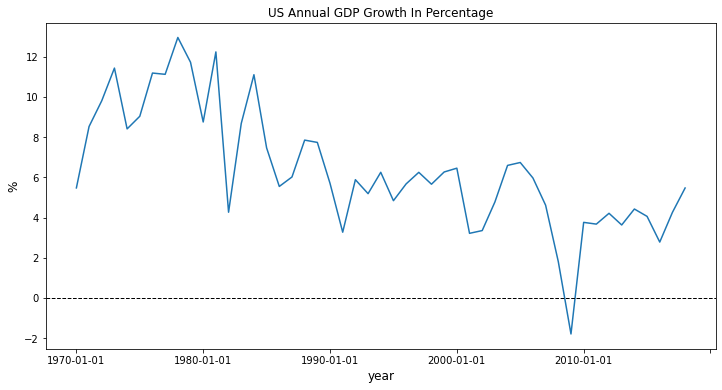

In [130]:
#Graphing the Unemployment Rate
data_G1=data_G.set_index('DATE')
ax = data_G1['1970':'2019'].plot(title='US Annual GDP Growth In Percentage', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
ax.axhline(linewidth=1, color='black', linestyle='--')
plt.show()

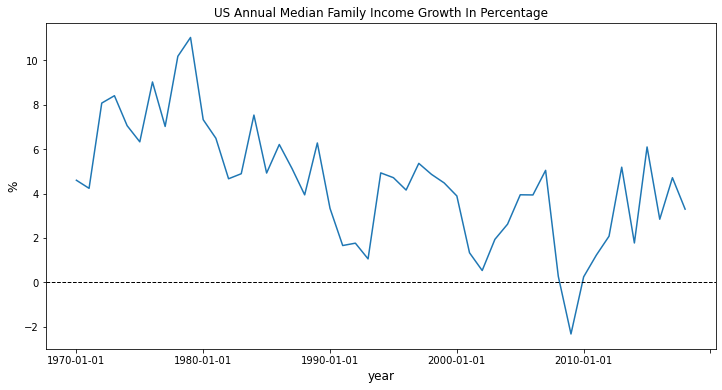

In [131]:
#Graphing for Median Family Income growth in percentage
data_IG1=data_IG.set_index('DATE')
ax = data_IG1['1970':'2019'].plot(title='US Annual Median Family Income Growth In Percentage', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
ax.axhline(linewidth=1, color='black', linestyle='--')
plt.show()

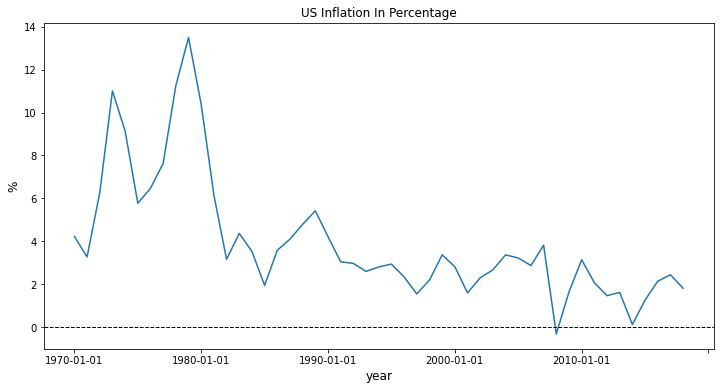

In [132]:
#Graphing for Inflation in percentage
data_I1=data_I.set_index('DATE')
ax = data_I1['1970':'2019'].plot(title='US Inflation In Percentage', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
ax.axhline(linewidth=1, color='black', linestyle='--')
plt.show()

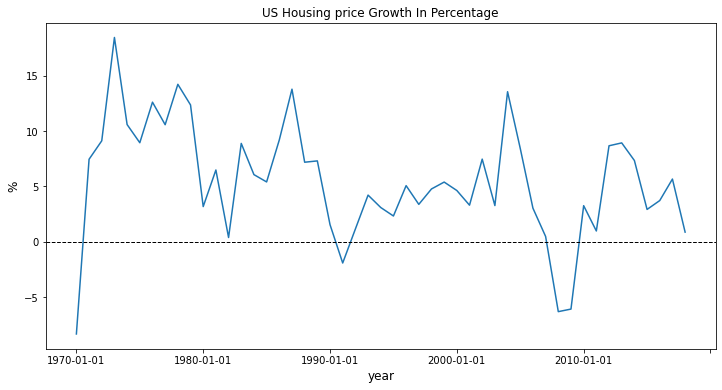

In [133]:
#Graphing for Median Sales Price growth in percentage of Houses Sold 
data_H1=data_H.set_index('DATE')
ax = data_H1['1970':'2019'].plot(title='US Housing price Growth In Percentage', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
ax.axhline(linewidth=1, color='black', linestyle='--')
plt.show()

# Data Analysis

In [134]:
data_merge=pd.merge(data_IG, data_G, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
data_merge.head()

,DATE,INCOME GROWTH,GDP GROWTH
0,1970-01-01,4.60087,5.47314
1,1971-01-01,4.23634,8.52868
2,1972-01-01,8.07973,9.80918
3,1973-01-01,8.41130,11.43481
4,1974-01-01,7.06165,8.40947


In [135]:
data_merge2=pd.merge(data_merge, data_I, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
data_merge2.head()

,DATE,INCOME GROWTH,GDP GROWTH,INFLATION
0,1970-01-01,4.60087,5.47314,4.226561
1,1971-01-01,4.23634,8.52868,3.272952
2,1972-01-01,8.07973,9.80918,6.258720
3,1973-01-01,8.41130,11.43481,11.011067
4,1974-01-01,7.06165,8.40947,9.141602


In [136]:
data_merge3=pd.merge(data_merge2, data_H, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
data_merge3.head()

,DATE,INCOME GROWTH,GDP GROWTH,INFLATION,HOUSING GROWTH
0,1970-01-01,4.60087,5.47314,4.226561,-8.30078
1,1971-01-01,4.23634,8.52868,3.272952,7.45474
2,1972-01-01,8.07973,9.80918,6.258720,9.11794
3,1973-01-01,8.41130,11.43481,11.011067,18.43778
4,1974-01-01,7.06165,8.40947,9.141602,10.58282


In [137]:
#Regression for GDP and Income
from scipy.stats import linregress
gradient, intercept, r_value, p_value, std_err = linregress(data_merge3['GDP GROWTH'], data_merge3['INCOME GROWTH'])
gradient, intercept, std_err, p_value

(0.7224490727608837,
 -0.014496365667485023,
 0.08308504484214502,
 2.0003116309274996e-11)

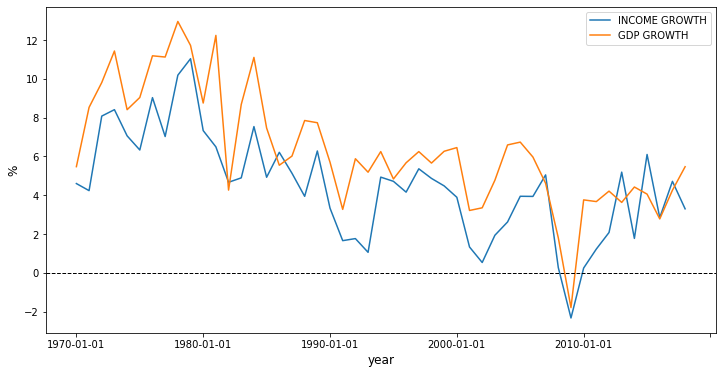

In [138]:
ax = data_IG1['1970':'2019'].plot(figsize=(12,6))
data_G1['1970':'2019'].plot(ax=ax)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
ax.axhline(linewidth=1, color='black', linestyle='--')

In [139]:
#Regression for Inflation and Income
from scipy.stats import linregress
gradient, intercept, r_value, p_value, std_err = linregress(data_merge3['INFLATION'], data_merge3['INCOME GROWTH'])
gradient, intercept, std_err, p_value

(0.6679462305821359,
 1.9398548923789596,
 0.09788815953936897,
 1.3710324096189851e-08)

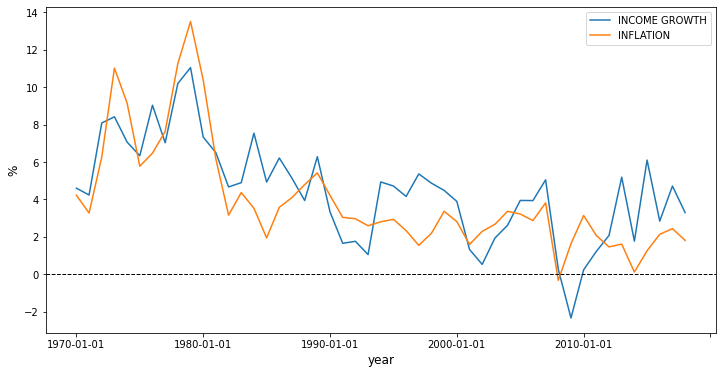

In [140]:
ax = data_IG1['1970':'2019'].plot(figsize=(12,6))
data_I1['1970':'2019'].plot(ax=ax)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
ax.axhline(linewidth=1, color='black', linestyle='--')

In [141]:
#Regression for Housing cost and Income
from scipy.stats import linregress
gradient, intercept, r_value, p_value, std_err = linregress(data_merge3['HOUSING GROWTH'], data_merge3['INCOME GROWTH'])
gradient, intercept, std_err, p_value

(0.2692690764559459,
 3.1242287947459064,
 0.06432859544530561,
 0.00012045297200698233)

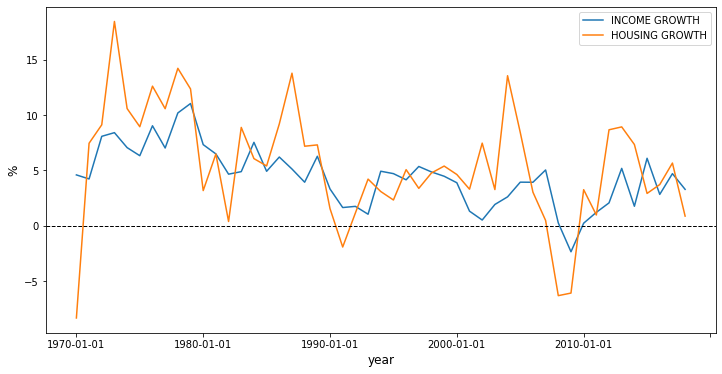

In [142]:
ax = data_IG1['1970':'2019'].plot(figsize=(12,6))
data_H1['1970':'2019'].plot(ax=ax)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
ax.axhline(linewidth=1, color='black', linestyle='--')

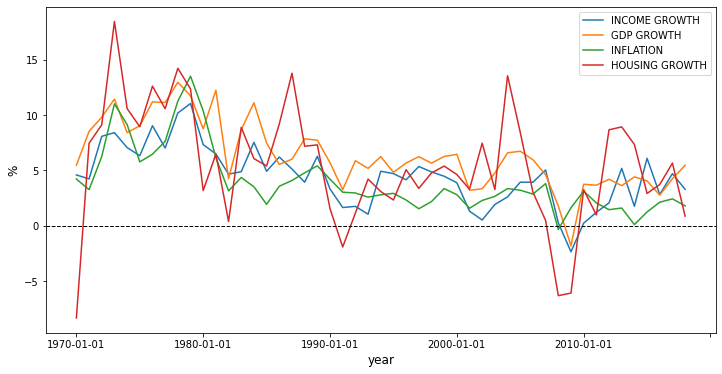

In [143]:
# plot for all four variables
ax = data_IG1['1970':'2019'].plot(figsize=(12,6))
data_G1['1970':'2019'].plot(ax=ax)
data_I1['1970':'2019'].plot(ax=ax)
data_H1['1970':'2019'].plot(ax=ax)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
ax.axhline(linewidth=1, color='black', linestyle='--')

# Concluding Remarks 

Our original hypothesis, before ruunning any analysis on the data we obtained, lead us to believe that nominal<br>
GDP growth would have have a positive relationship with inflation and the cost of housing from 1970-2010. However,<br>
we predicted that all three variables would be negatively correlated with the median household income growth. After<br>
computing our results, it is clear that all three regression analyses provide sufficient evidence to negate our<br>
initial assumption. In fact, all three regressions show with great strength, as measured by the three highly<br>
significant p-values, that there is a positive correlation between all three variables and median household income growth.<br>
This is also reflected in the last graph where you can see the trends of all four variables fluctauting in relative<br>
unison over the time period. In addition, from the analysis we can see that the purchasing power of Americans corrected<br> with inflation and remained stable over time. However, to address the goal of our project, we observed that median<br> household income did indeed grow and shrink with the ups and downs of the overall market following it relatively closely.<br> This is also supported by the st. error between income and the three other variables that stayed within 6.43-9.79%. It<br> appears that, the average American income grew proportional to the growth of the overall market and did not represent a<br>
disparity as we previously sought to prove.  

